# Airline Sentiment Analysis Project

<h2>Project Objective</h2><br>
    1. Analysing data to visualize airline trends
        <ul>
        <li>What most posetive or negative tweets for each airline service talks about?</li>
        <li>Does time of flight affect quality service?</li>
        <li>Which reason commonly tweeted by customers for bad service?</li>
        <li>Counting for retweeted negative tweets to shows which service is highly affecting.</li>
        </ul>
    2.  Classifying whether the sentiment of the tweets is positive, neutral, or negative using Machine Learning Techniques, then categorizing negative tweets for their reason.

# Data Analysis

In [1]:
import pandas as pd ## for reading and undestanding data
import matplotlib.pyplot as plt ## for plotting data
import seaborn as sns ## another library to visualize data features
import numpy as np ## for numerical array processing

In [2]:
##reading data
data=pd.read_csv('twitter-airline/Tweets.csv')
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [3]:
data=data[['tweet_id','text','airline_sentiment','airline_sentiment_confidence','negativereason','airline','retweet_count','tweet_created']]

In [4]:
data.head()

,tweet_id,text,airline_sentiment,airline_sentiment_confidence,negativereason,airline,retweet_count,tweet_created
0,570306133677760513,@VirginAmerica What @dhepburn said.,neutral,1.0000,NaN,Virgin America,0,2015-02-24 11:35:52 -0800
1,570301130888122368,@VirginAmerica plus you've added commercials t...,positive,0.3486,NaN,Virgin America,0,2015-02-24 11:15:59 -0800
2,570301083672813571,@VirginAmerica I didn't today... Must mean I n...,neutral,0.6837,NaN,Virgin America,0,2015-02-24 11:15:48 -0800
3,570301031407624196,@VirginAmerica it's really aggressive to blast...,negative,1.0000,Bad Flight,Virgin America,0,2015-02-24 11:15:36 -0800
4,570300817074462722,@VirginAmerica and it's a really big bad thing...,negative,1.0000,Can't Tell,Virgin America,0,2015-02-24 11:14:45 -0800


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 8 columns):
tweet_id                        14640 non-null int64
text                            14640 non-null object
airline_sentiment               14640 non-null object
airline_sentiment_confidence    14640 non-null float64
negativereason                  9178 non-null object
airline                         14640 non-null object
retweet_count                   14640 non-null int64
tweet_created                   14640 non-null object
dtypes: float64(1), int64(2), object(5)
memory usage: 915.1+ KB


In [6]:
semtiments=pd.crosstab(data.airline, data.airline_sentiment)
semtiments

airline_sentiment,negative,neutral,positive
airline,,,
American,1960,463,336
Delta,955,723,544
Southwest,1186,664,570
US Airways,2263,381,269
United,2633,697,492
Virgin America,181,171,152


In [7]:
negative_tweet=data[(data['airline_sentiment']=='negative')]
negative_tweet.head()

,tweet_id,text,airline_sentiment,airline_sentiment_confidence,negativereason,airline,retweet_count,tweet_created
3,570301031407624196,@VirginAmerica it's really aggressive to blast...,negative,1.0000,Bad Flight,Virgin America,0,2015-02-24 11:15:36 -0800
4,570300817074462722,@VirginAmerica and it's a really big bad thing...,negative,1.0000,Can't Tell,Virgin America,0,2015-02-24 11:14:45 -0800
5,570300767074181121,@VirginAmerica seriously would pay $30 a fligh...,negative,1.0000,Can't Tell,Virgin America,0,2015-02-24 11:14:33 -0800
15,570282469121007616,@VirginAmerica SFO-PDX schedule is still MIA.,negative,0.6842,Late Flight,Virgin America,0,2015-02-24 10:01:50 -0800
17,570276917301137409,@VirginAmerica I flew from NYC to SFO last we...,negative,1.0000,Bad Flight,Virgin America,0,2015-02-24 09:39:46 -0800


Most common words in negative tweets

In [10]:
negative_tweet.airline.value_counts() #counts number of negative rate for each airline to identify worse airway of 2015

United            2633
US Airways        2263
American          1960
Southwest         1186
Delta              955
Virgin America     181
Name: airline, dtype: int64

In [8]:
from wordcloud import WordCloud
def plotWords(words):
    wordcloud=WordCloud(width=1200, height=600, random_state=21,max_font_size=110).generate(words)
    plt.figure(figsize=(10,7))
    plt.imshow(wordcloud,interpolation="bilinear")
    plt.axis('off')
    plt.show()

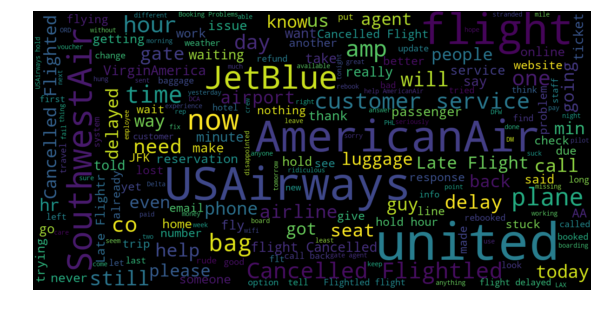

In [9]:
neg_tweet_words=negative_tweet.text.values.tolist()
neg_words=' '.join([text for text in neg_tweet_words])
plotWords(neg_words)

The plot is showing wich airline service is more tweeted for negative sentiment and reason for negativity.

Lets look at posetive comments to understand services on which customers are more satisfied.

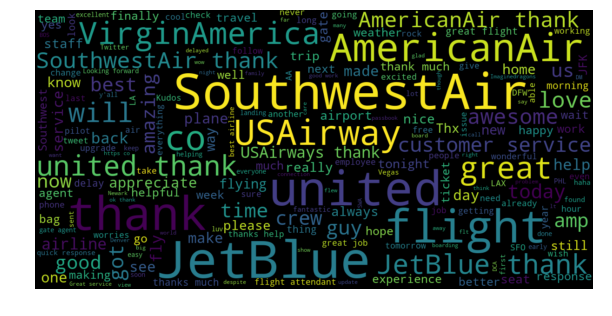

In [47]:
posetive_tweet=data[(data['airline_sentiment']=='positive')]
pos_tweet_words=posetive_tweet.text.values.tolist()
pos_words=' '.join([text for text in pos_tweet_words])
plotWords(pos_words)

appreciate, good, thanks, really, great, amazing, best, nice, happy, ... shows services on which customers are ok with airlines.

In [11]:
def plot_bar(title,x_label,y_label,data):
    fig, ax = plt.subplots(figsize=(10, 3))
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.set_ylabel(y_label , fontsize=12)
    ax.set_title(title, fontsize=15, fontweight='bold')
    _=data.plot(kind='bar')

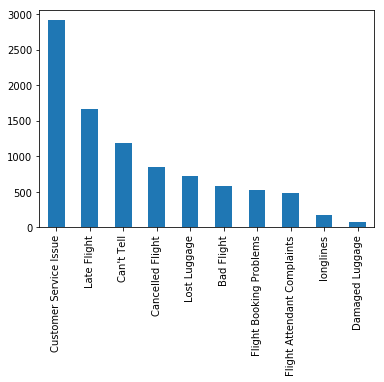

In [12]:
reason_count=negative_tweet['negativereason'].value_counts()
_=reason_count.plot(kind='bar')

In [13]:
airline_neg_reason=negative_tweet.groupby('airline')['negativereason'].value_counts()
airline_neg_reason.unstack()

negativereason,Bad Flight,Can't Tell,Cancelled Flight,Customer Service Issue,Damaged Luggage,Flight Attendant Complaints,Flight Booking Problems,Late Flight,Lost Luggage,longlines
airline,,,,,,,,,,
American,87,198,246,768,12,87,130,249,149,34
Delta,64,186,51,199,11,60,44,269,57,14
Southwest,90,159,162,391,14,38,61,152,90,29
US Airways,104,246,189,811,11,123,122,453,154,50
United,216,379,181,681,22,168,144,525,269,48
Virgin America,19,22,18,60,4,5,28,17,5,3


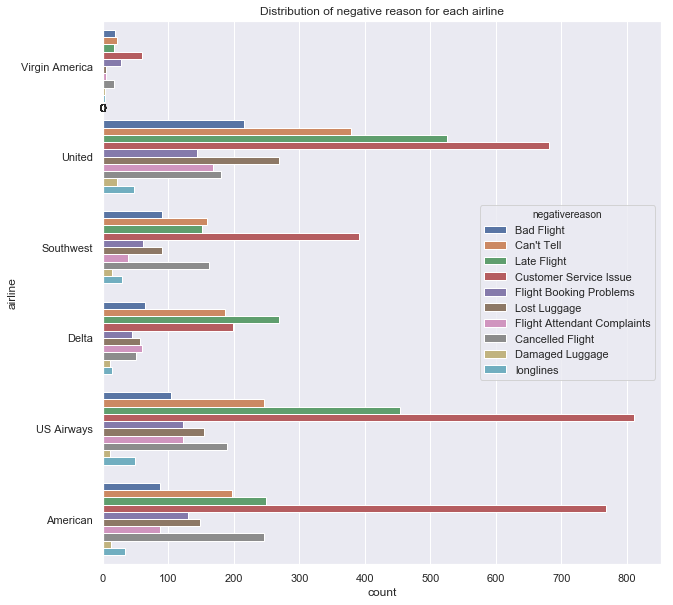

In [51]:
def plot_sns(x,y,data):
    sns.set(rc={'figure.figsize':(10,10)})
    ax=sns.countplot(y=y,hue=x,data=data)
    for p in ax.patches:
        patch_height = p.get_height()
        if np.isnan(patch_height):
            patch_height = 0
        ax.annotate('{}'.format(int(patch_height)), (p.get_x()+0.01, patch_height+0.5),ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    plt.title("Distribution of negative reason for each airline")
    plt.show()
plot_sns('negativereason','airline',negative_tweet)

# plt.figure(figsize=(6, 8))
# splot = sns.barplot(data=df, x = 'sex', y = 'total_bill', ci = None)
# for p in splot.patches:
# splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
#                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

The plot and table above interstingly depicts the United, US, and American airlines has worest service than Delta, Virgin America, and Southwest airlines. Except, Delta and Virgin America airways, the rest four has no good customer handling and United and US airways also mostly late on flight time. Comaratively, Virgin America is good than other and then Delta is next choise.

# Does flight time has relation to negative reason?

We will focus on top three airlines with negative sentiment

In [15]:
#time based analysis
data['tweet_created']=data['tweet_created'].astype('datetime64[ns]') ## conversion of data type to datetime
data.head()

,tweet_id,text,airline_sentiment,airline_sentiment_confidence,negativereason,airline,retweet_count,tweet_created
0,570306133677760513,@VirginAmerica What @dhepburn said.,neutral,1.0000,NaN,Virgin America,0,2015-02-24 19:35:52
1,570301130888122368,@VirginAmerica plus you've added commercials t...,positive,0.3486,NaN,Virgin America,0,2015-02-24 19:15:59
2,570301083672813571,@VirginAmerica I didn't today... Must mean I n...,neutral,0.6837,NaN,Virgin America,0,2015-02-24 19:15:48
3,570301031407624196,@VirginAmerica it's really aggressive to blast...,negative,1.0000,Bad Flight,Virgin America,0,2015-02-24 19:15:36
4,570300817074462722,@VirginAmerica and it's a really big bad thing...,negative,1.0000,Can't Tell,Virgin America,0,2015-02-24 19:14:45


In [16]:
data['tweet_created_date']=data.tweet_created.dt.date
data['tweet_created_weekday_name']=data.tweet_created.dt.weekday_name
data['tweet_created_hour']=data.tweet_created.dt.hour
data.head()

,tweet_id,text,airline_sentiment,airline_sentiment_confidence,negativereason,airline,retweet_count,tweet_created,tweet_created_date,tweet_created_weekday_name,tweet_created_hour
0,570306133677760513,@VirginAmerica What @dhepburn said.,neutral,1.0000,NaN,Virgin America,0,2015-02-24 19:35:52,2015-02-24,Tuesday,19
1,570301130888122368,@VirginAmerica plus you've added commercials t...,positive,0.3486,NaN,Virgin America,0,2015-02-24 19:15:59,2015-02-24,Tuesday,19
2,570301083672813571,@VirginAmerica I didn't today... Must mean I n...,neutral,0.6837,NaN,Virgin America,0,2015-02-24 19:15:48,2015-02-24,Tuesday,19
3,570301031407624196,@VirginAmerica it's really aggressive to blast...,negative,1.0000,Bad Flight,Virgin America,0,2015-02-24 19:15:36,2015-02-24,Tuesday,19
4,570300817074462722,@VirginAmerica and it's a really big bad thing...,negative,1.0000,Can't Tell,Virgin America,0,2015-02-24 19:14:45,2015-02-24,Tuesday,19


In [45]:
negative_tweet=data[(data['airline_sentiment']=='negative')]
neg_by_wkday = negative_tweet.groupby(['tweet_created_weekday_name']).negativereason.value_counts()
neg_by_wkday.unstack()

negativereason,Bad Flight,Can't Tell,Cancelled Flight,Customer Service Issue,Damaged Luggage,Flight Attendant Complaints,Flight Booking Problems,Late Flight,Lost Luggage,longlines
tweet_created_weekday_name,,,,,,,,,,
Friday,71,119,52,207,4,41,47,237,57,14
Monday,121,316,227,791,13,105,122,399,207,45
Saturday,55,117,100,313,9,42,56,135,53,21
Sunday,103,175,210,547,11,105,73,360,121,39
Thursday,57,108,31,197,5,37,54,124,38,15
Tuesday,112,241,173,615,19,102,128,268,160,27
Wednesday,61,114,54,240,13,49,49,142,88,17


Text(0, 0.5, 'Negative Reason')

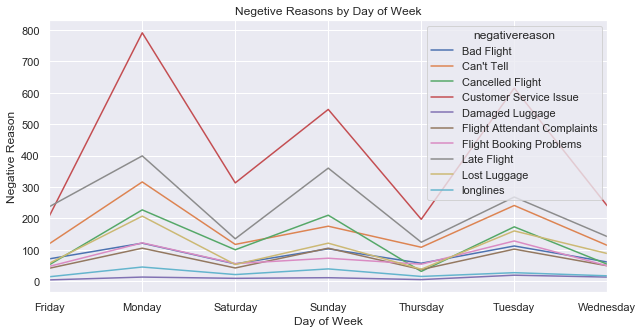

In [46]:
neg_by_wkday = neg_by_wkday.unstack().plot(kind='line',figsize=(10,5),rot=0,title="Negetive Reasons by Day of Week")
neg_by_wkday.set_xlabel("Day of Week")
neg_by_wkday.set_ylabel("Negative Reason")

The plot clearly depicts expect Friday, Saturday, Thursady and Wednesday flights are comaratively good. Monday, Sunday and Tuesday flights has customer service problem and are mostly late (the green lines also shows that probability of cancelation of flights by Monday, Sunday and Tuesday is high).

Text(0, 0.5, 'Negative Reason')

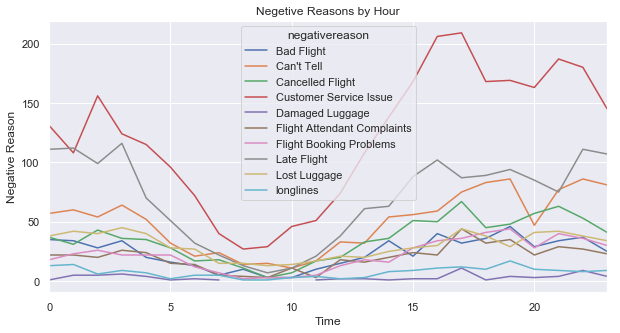

In [43]:
neg_by_time = negative_tweet.groupby(['tweet_created_hour']).negativereason.value_counts()

neg_by_time = neg_by_time.unstack().plot(kind='line',figsize=(10, 5),title="Negetive Reasons by Hour")
neg_by_time.set_xlabel("Time")
neg_by_time.set_ylabel("Negative Reason")

Time based analysis is showing something good look to optimize airline service.
<ul>
    <li>Relatively good customer sutisfaction period (6 A.M to 10 A.M) </li>
    <li>7:AM to 9:AM less customer service issue </li>
    <li>1:pm to 7:pm almost no late flight</li>
    <li>9:AM no cancelled flight</li>
  </ul>

<b>Flights at time range 0:00 A.M -03:00 A.M and 04:00 PM - 06:00 PM are with high customer dististfaction.</b>